# Rdionica: priprema datoteke `podaci_upitnik.csv` za obradu

In [2]:
options(repr.matrix.max.cols = 120, repr.matrix.max.rows = 500,
       repr.plot.height = 4, repr.plot.width = 4)

In [ ]:
install.packages(c('janitor', 'psych', 'here', 'wrapr', 'conflicted'))

U ovom dijelu radionice proći ćemo put od sirovih podataka do podataka na kojima možemo provesti analizu.

Prije nego što se bacimo na učitavanje i proučavanje sirovih podataka, učitat ćemo pakete koje ćemo koristiti.

Pakete učitavamo pozivanjem funkcije `library`, koja kao argument prima ime **jednog** paketa.

In [1]:
# skupina paketa koja sadrži većinu paketa koje
# ćemo koristiti za baratanje podacima
library(tidyverse)

# paket koji sadrži 'pipe' operatore
library(magrittr)

# upozorava na konflikte u imenima funkcija
# koji se javljaju kad više paketa koristi isto
# ime
library(conflicted)

# omogućava učitavanje .SAV fielova
library(foreign)

# paket koji sadrži neke zgodne olakšice
library(wrapr)

# olakšava korištenje relativnih file pathova
library(here)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.7
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /home/denis/Documents/rdionica


## Učitavanje podatka

Za početak, pogledat ćemo kako izgledaju naši sirovi podaci.

A da bismo to učinili, prvo ih moramo učitati u R.

Pogledat ćemo kako učitati tri vrste datoteka: SPSS-ov `.sav`, Excelov `.xls/xlsx` te generički *comma separated values* file - `.csv`.

### SPSS - .sav

### Excel - .xls(x)

### Comma separated values - .csv

*Comma separeted value* datoteke su točno to što ime kaže - podaci koji su strukturirani kao vrijednosti odvojene zarezima, gdje se svaki unos (na primjer sudionik) nalazi u zasebnom redu, a vrijednosti varijabli koje su uz njega povezane ispisane su redom i odvojene su zarezima.

U prvom redu (koji funkcije u R-u često nazivaju **header**) obično se nalaze imena varijabli, a u ostalim redovima su njihove vrijednosti.

Ovako izgledaju prva dva reda i prvih nekoliko stupaca datoteke `podaci_upitnik.csv`:

```
attitudesAndNorms01,attitudesAndNorms02,attitudesAndNorms03, ...
5,5,5,5,4, ...
```

Podatke u `.csv` formatu možemo učitati pomoću funkcije `read_csv` iz `readr` paketa (koji je automatski učitan kad smo učitali `tidyverse`). Osnovni (base) R ima funkciju `read.csv` koja obavlja isti zadatak, ali neki R developeri preporučuju korištenje `read_csv` funkcije (na primjer, Hadley Wickham i Garret Grolemund: http://r4ds.had.co.nz/import.html).

U skladu s tom preporukom, koristit ćemo `read_csv`. Podatke iz datoteke `podaci_upitnik.csv` možemo učitati ovako:

In [27]:
podaci <- read_csv(file = here('podaci', 'podaci_upitnik.csv'))

Parsed with column specification:
cols(
  .default = col_integer(),
  pi_education = col_character(),
  pi_gender = col_character(),
  pi_ideology = col_character(),
  pi_income = col_character(),
  pi_nationality = col_character(),
  pi_previousDonations = col_character()
)
See spec(...) for full column specifications.


Poruka koju dobivamo obavještava nas o tome kako su određene varijable reprezentirane. Vidimo da su varijable koje počinju s `pi` reprezentirane kao `character`. Ako pozovemo funkciju `spec`, vidjet ćemo specifikacije svih varijabli.

Budući da pozivanjem funkcije `str` zapravo dobivamo manje-više iste podatke, pozvat ćemo samo nju. Njen output pomoći će nam da vidimo jesu li podaci reprezentirani onako kako bismo očekivali.

In [5]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  64 variables:
 $ attitudesAndNorms01           : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02           : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03           : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04           : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05           : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06           : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07           : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08           : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                  : int  7 6 7 1 8 7 11 8 3 7 ...
 $ charitableBehavior01          : int  37 18 7 14 0 37 33 29 16 6 ...
 $ charitableBehavior02          : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01      : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02      : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03      : int  2 3 2 2 2 3 3 4 4 5 ...
 $ descriptiveSocialNorms04

Obrisat ćemo specifikacije varijabli da ne zakrčuju output.

Funkcije `head` i `tail` omogućuju nam da na brzinu vidimo (po defaultu) prvih 6 odnosno posljednjih 6 redova tablice.

In [28]:
attr(podaci, 'spec') <- NULL

In [ ]:
head(podaci)

In [ ]:
tail(podaci, 3)

Ove funkcije pomažu nam pri pregledavanju strukture podataka i njihovih sirovih vrijednosti.

Osnovnu deskriptivnu statistiku možemo dobiti pomoću generičke funkcije `summary`. Generičke funkcije primaju objekte različitih tipova, a njihov output ovisi o tipu objekta. Primjerice, ako u `summary` stavimo `data.frame`, dobit ćemo grubu deskriptivnu statistiku njegovih stupaca. Ako u funkciju stavimo regresijski model, dobit ćemo informacije o modelu.

Dobro je znati i za funkciju `describe` iz paketa `psych`, koja daje dosta detaljniju deskriptivnu statistiku numeričkih varijabli.

Idemo vidjeti output tih dviju funkcija kad u nju stavimo neke numeričke i neke kategorijalne (`factor`) stupce iz našeg `data.framea` `podaci`.

In [4]:
summary(podaci[, wrapr::qc(attitudesAndNorms01, pi_education, pi_gender)])

 attitudesAndNorms01 pi_education        pi_gender        
 Min.   :2.00        Length:100         Length:100        
 1st Qu.:4.00        Class :character   Class :character  
 Median :5.00        Mode  :character   Mode  :character  
 Mean   :5.04                                             
 3rd Qu.:6.00                                             
 Max.   :8.00                                             

Vidimo tri stvari: (1) `summary` nije pretjerano koristan za varijable koje su tipa `character` i (2-3) pojavili su se nova sintaksa i nova funkcija.

`qc` je funkcija iz paketa `wrapr` koja nas oslobađa pisanja navodnika pri korištenju funkcije `c`. `qc` je, dakle, *quoted combine*.

Korištenjem `::` sintakse označili smo da je funkcija `qc` iz paketa `wrapr`. Pri pozivanju funkcija iz drugih paketa **nije nužno** pisati `::`; to smo vidjeli i kod pozivanja funkcije `read_csv` iz paketa `readr`.

Ipak, važno je znati tu sintaksu iz dva razloga.

Prvo, korištenjem `::` možemo pozvati funkciju iz paketa koji prethodno nismo učitali (što ćemo vidjeti pri pozivanju funkcije `describe`.

Drugo, u slučaju da dva paketa imaju funkcije koje se jednako zovu, `::` nam omogućava da specificiramo koju funkciju želimo pozvati. Budući da smo učitali paket `conflicted`, R će nas upozoriti ako dođe do konflikta te nas tražiti da specificiramo koju funkciju hoćemo pozvati, koristeći `::`.

Sad ćemo pogledati output funkcije `describe` na tim istim varijablama.

Nastavit ću koristiti `::` notaciju tako da bude jasno iz kojeg paketa dolazi koja funkcija (osim ako je spomenuto u tekstu ili ako je funkcija iz base R-a).

**BAM-BAM PIPE**

In [57]:
podaci %>%
dplyr::select(attitudesAndNorms01, pi_education, pi_gender) %>%
psych::describe(.)

Warning message in psych::describe(.):
“NAs introduced by coercion”Warning message in psych::describe(.):
“NAs introduced by coercion”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”Warning message in FUN(newX[, i], ...):
“no non-missing arguments to max; returning -Inf”

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
attitudesAndNorms01,1,100,5.04,1.427861,5,5.0625,1.4826,2,8,6,-0.1931472,-0.5916736,0.1427861
pi_education*,2,100,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
pi_gender*,3,100,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


I dalje nije korisno za `character` varijable, ali omogućava digresiju u svijet pipa.

## Pipe

Pipe su posebni operatori iz `magrittr` paketa. One omogućavaju kraće i, često, razumljivije pisanje koda.

Pipa uzima output izraza sa svoje lijeve strane i daje ga kao argument funkciji na svojoj desnoj strani.

Osnovna pipa je `%>%`. Ona se nalazi i u paketu `dplyr` (koji se učitava kad učitamo `tidyverse`) i u paketu `magrittr`. Posebno smo učitali `magrittr` jer s njim dolaze i neke pipe kojih nema u `dplyru`.

Sad ćemo proći kroz pipe koje `magrittr` nudi.

### %>%

Kao što je rečeno, ovo je osnovna pipa. Ona uzima output izraza s lijeve strane i koristi ga kao input za izraz s desne strane.

Dakle:

In [8]:
(2 + 2) %>% sqrt(.)

(2 + 2) %>% sqrt()

(2 + 2) %>% sqrt

sqrt(2 + 2)

[1] 2

[1] 2

[1] 2

[1] 2

Trenutačno ne izgleda kao neka ušteda, što je u redu. Kasnije ćemo vidjeti primjere u kojima su pipe dosta zgodnije.

Kod korištenja pipa, `.` označava output iz funkcije s lijeve strane. Po defaultu, pipa će točku staviti na mjesto prvog argumenta. Takav default uglavnom jako dobro funkcionira s funkcijama iz `tidyversea` jer one imaju dosta uniformnu sintaksu, koja je prilagođena za pipe.

Ipak, nekad takvo ponašanje nije poželjno. Pokušajmo grafirati dva brojčana vektora - jedan od njih ćemo spremiti u varijablu, a drugi ćemo direktno dati pipi.

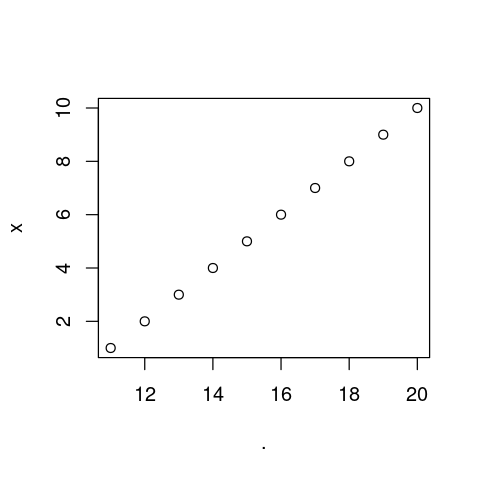

In [21]:
# ova vrijednost treba ići na x os
x <- 1:10

# vektor koji ćemo sad stvoriti treba ići na y os
# ovaj kod jednak je ovom -> 11:20 %>% plot(., x)
# plot je također generička funkcija
11:20 %>% plot(x)

Vidimo da je pipa stavila svoje vrijednosti na prvo mjesto, a time i na x os. Da bismo spriječili takvo defaultno ponašanje pipe, izraz s desne strane možemo staviti u vitičaste zagrade (`{}`).

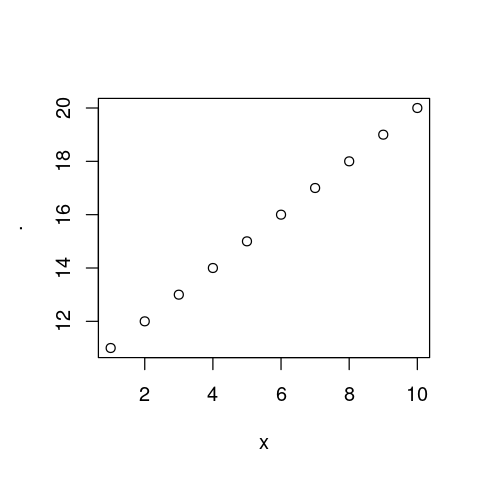

In [22]:
11:20 %>% {plot(x, .)}

Sad ćemo `x` staviti u `data.frame` i pridružiti mu `y`.

In [26]:
za_graf <- data.frame(x = 1:10, y = 11:20)

str(za_graf)

'data.frame':	10 obs. of  2 variables:
 $ x: int  1 2 3 4 5 6 7 8 9 10
 $ y: int  11 12 13 14 15 16 17 18 19 20


Ponovno ćemo pokušati plotati vrijednosti tako što `za_graf` stavimo u pipu.

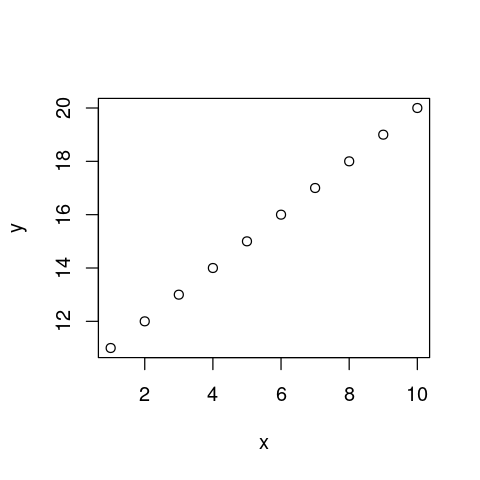

In [27]:
za_graf %>% plot()

Da bismo zamijenili osi, možemo učiniti sljedeće:

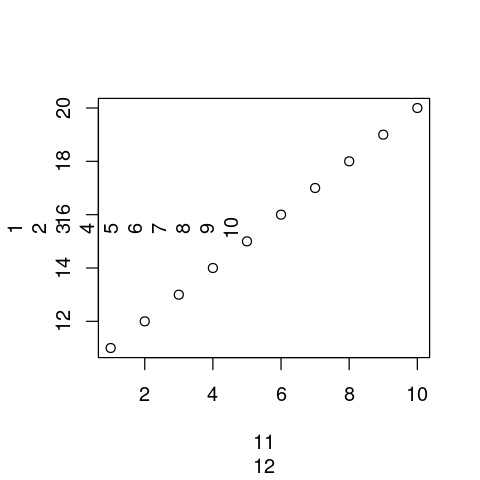

In [30]:
za_graf %>% plot(.$y, .$x)

To jest, ne možemo jer se gornji kod interpretira kao
```
za_graf %>% plot(., .$y, .$x)
```

Dakle, ponovno možemo izraz s desne strane opkoliti vitičastim zagradama.

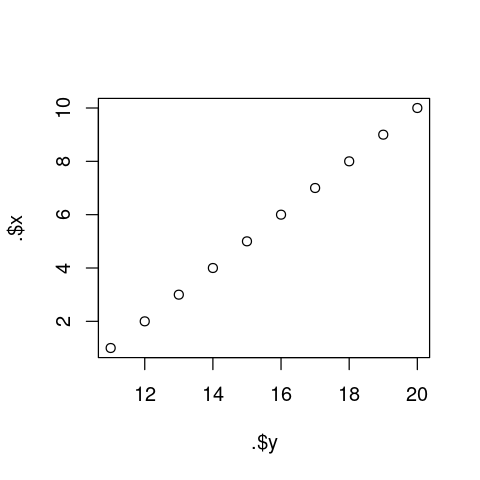

In [31]:
za_graf %>% {plot(.$y, .$x)}

Da se smanje takve konfuzije, neki preporučuju da se `.` uvijek piše, tako da je to praksa koju ćemo ovdje usvojiti.

No, osim zatvaranja izraza s desne strane u zagrade, možemo iskoristiti jednu drugu pipu.

### %$%

`%$%` je *variable exposition* pipa. Ona nam daje direktan pristup varijablama koje se nalaze u objektu kojim baratamo.

Gornji problem mogli bismo riješiti i ovako:

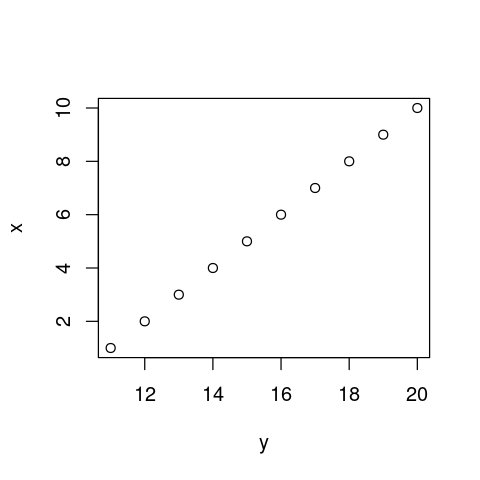

In [32]:
za_graf %$% plot(y, x)

Možemo kombinirati različite pipe. Na primjer:

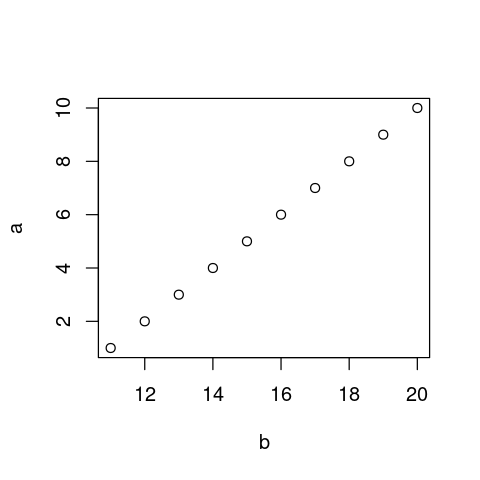

In [36]:
1:10 %>% data.frame(a = ., b = 11:20) %$% plot(b, a)

U gornjem primjeru bi nam možda bilo zgodno da možemo pogledati strukturu `data.framea` nakon što ga stvorimo ili napraviti još neke operacije nakon što plotamo varijable.

Na sreću, imamo pipu i za to.

### %T>%

T-pipa (izvorno *tee*) vraća izraz s lijeve strane umjesto izraza s desne strane. Zbog toga, možemo učiniti sljedeće:

'data.frame':	10 obs. of  2 variables:
 $ a: int  1 2 3 4 5 6 7 8 9 10
 $ b: int  11 12 13 14 15 16 17 18 19 20


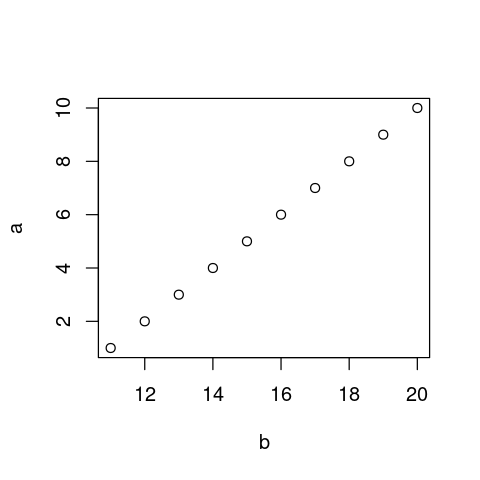

In [37]:
1:10 %>% data.frame(a = ., b = 11:20) %T>% str %$% plot(b, a)

[1] 210

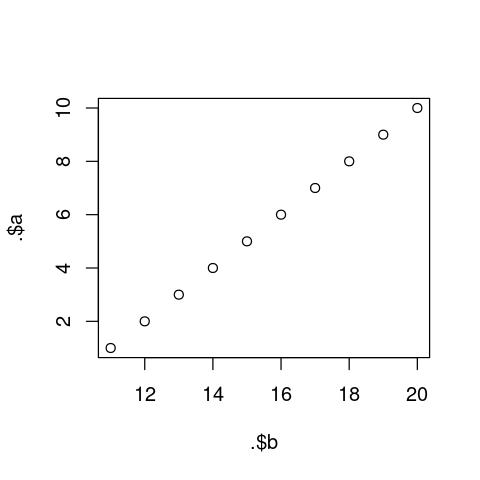

In [42]:
1:10 %>% data.frame(a = ., b = 11:20) %T>%
{plot(.$b, .$a)} %$%
sum(a,b)

Preostaje nam još jedna pipa...

### %<>%

`%<>%` je *assignment* pipa. Ona istovremeno uzima i piše u vrijednost s lijeve strane. To nam omogućuje da neku varijablu provučemo kroz seriju transformacijskih koraka.

In [58]:
za_graf$x %<>% magrittr::add(., 2) %>%
magrittr::multiply_by(., 2) %>% sqrt(.)

str(za_graf)

'data.frame':	10 obs. of  2 variables:
 $ x: num  3.21 3.22 3.23 3.24 3.25 ...
 $ y: int  11 12 13 14 15 16 17 18 19 20


Ovime završavamo upoznavanje s pipama. Nakratko se vraćamo natrag na primjer s funkcijom `describe`, nakon čega ponovno odlazimo u uzbudljivu digresiju.

## dplyr::select i dplyr::filter

Već smo ranije vidjeli funkciju `select`, koja nam je omogućila da izaberemo 3 od 64 stupca iz `data.framea` `podaci`. Za odabiranje pojedinih redova koji zadovoljavaju određeni logički izraz možemo koristiti funkciju `filter`.

Sad ćemo prikazati deskriptivnu statistiku za pitanja koja tvore jednu od skala koja se nalazi u našim podacima - skalu internalizacije moralnog identiteta - samo na poduzorku žena.

Sve varijable koje se odnose na tu skalu imaju ime oblika `moralIdentityInternalization<broj-pitanja>`. Zbog tog sustavnog imenovanja, ne moramo ispisivati imena (ili redne brojeve) svih varijabli koje želimo zahvatiti funkcijom `describe`, nego možemo pozvati funkciju `contains` unutar funkcije `select`.

`contains` na omogućuje da odaberemo samo one varijable koje sadrže zadani string.

In [72]:
podaci %>%
dplyr::filter(., pi_gender == 'Female') %>%
dplyr::select(., contains('internal', ignore.case = T)) %T>% str(.) %>%
psych::describe(.)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	45 obs. of  5 variables:
 $ moralIdentityInternalization01: int  4 5 5 4 4 5 4 6 6 5 ...
 $ moralIdentityInternalization02: int  3 5 5 3 3 3 3 5 6 3 ...
 $ moralIdentityInternalization03: int  1 1 1 1 1 1 1 1 1 1 ...
 $ moralIdentityInternalization04: int  2 3 1 2 4 2 2 1 1 2 ...
 $ moralIdentityInternalization05: int  4 5 5 4 2 4 4 6 6 5 ...


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
moralIdentityInternalization01,1,45,4.711111,0.6613424,5,4.675676,0.0000,3,6,3,-0.09499871,-0.2560002,0.0985871
moralIdentityInternalization02,2,45,4.177778,1.0288760,4,4.081081,1.4826,3,7,4,0.63057485,-0.2803328,0.1533758
moralIdentityInternalization03,3,45,1.000000,0.0000000,1,1.000000,0.0000,1,1,0,NaN,NaN,0.0000000
moralIdentityInternalization04,4,45,1.488889,0.8692270,1,1.459459,1.4826,0,4,4,0.33779878,0.2010560,0.1295767
moralIdentityInternalization05,5,45,4.488889,0.9200351,4,4.513514,1.4826,2,6,4,-0.22495256,-0.1641706,0.1371507


In [71]:
# base R rješenje za usporedbu
psych::describe(podaci[podaci$pi_gender == 'Female', qc(moralIdentityInternalization01,
                                                moralIdentityInternalization02,
                                                moralIdentityInternalization03,
                                                moralIdentityInternalization04,
                                                moralIdentityInternalization05)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
moralIdentityInternalization01,1,45,4.711111,0.6613424,5,4.675676,0.0000,3,6,3,-0.09499871,-0.2560002,0.0985871
moralIdentityInternalization02,2,45,4.177778,1.0288760,4,4.081081,1.4826,3,7,4,0.63057485,-0.2803328,0.1533758
moralIdentityInternalization03,3,45,1.000000,0.0000000,1,1.000000,0.0000,1,1,0,NaN,NaN,0.0000000
moralIdentityInternalization04,4,45,1.488889,0.8692270,1,1.459459,1.4826,0,4,4,0.33779878,0.2010560,0.1295767
moralIdentityInternalization05,5,45,4.488889,0.9200351,4,4.513514,1.4826,2,6,4,-0.22495256,-0.1641706,0.1371507


`contains` je jedna od nekoliko pomoćnih funkcija koje su super za `select`. Druge su:
- `starts_with`, koja odabire varijable koje počinju s određenim stringom
- `ends_with`, isto, samo za kraj
- `one_of`, koju treba koristiti kad `selectu` dajemo `character` vektor
- `matches`, koji nam omogućava da odaberemo varijable čija imena odgovaraju nekom **regularnom izrazu**

## Regularni izrazi

Regularni izrazi (eng. *regular expressions*, *regex* ili *regexp*) su stringovi koji označavaju neki uzorak za pretraživanje. Na primjer, sve ove izraze
```
string
striing
striiing
striiiiiiiiiiiiiiiiing
```
možemo opisati stringom `stri*ng`. Znak `*` (asterisk) je **kvantifikator** koji označava *nula ili više ponavljanja prethodnog znaka*. To znači da bi taj regularni izraz pronašao i string `strng`.

Uz razne kvantifikatore, postoje još i klase znakova te meta-znakovi koji nam omogućavaju lako pretraživanje stringova.

Regexi su implementirani u base R-u (npr. funkcije `grep` i `grepl`) i u `tidyverseu` kroz paket `stringr`. Mi ćemo se baviti `stringrom`. Budući da postoje razne implementacije regularnih izraza, koje se razlikuju po kompleksnosti, bitno je znati da `stringr` koristi **Perl/PCRE** regularne izraze.

U ovom dijelu ćemo pogledati osnove regularnih izraza, koje ćemo nadograđivati kroz ostatak radionice.

### Kvantifikatori

#### *

Kao što je već rečeno, `*` označava **0 ili više** ponavljanja **znaka** koji mu prethodi. *Znak* se ovdje odnosi na doslovni znak, na klasu znakova ili na grupu znakova. S klasama i grupama ćemo se upoznati malo kasnije.

Pogledat ćemo output funkcije `str_detect` koja kao input uzima string (ili više njih) i regularni izraz (`pattern`), a vraća `TRUE` ili `FALSE` ovisno o tome nalazi li se regularni izraz u stringu ili ne.

In [37]:
stringr::str_detect(string = qc(kobilaaaa, maajka, celer), pattern = 'a*') %>% print

[1] TRUE TRUE TRUE


#### +

`+` označava **jedno (1) ili više** ponavljanja prethodnog znaka/klase znakova/grupe znakova.

Pogledat ćemo što će nam vratiti funkcija `str_extract_all` koja prima iste argumente kao i `str_detect`, a vraća sve pronađene `patterne`.

In [43]:
stringr::str_extract_all(string = qc(kobilaaaa, maajka, celer), pattern = 'a+') %>% print

[[1]]
[1] "aaaa"

[[2]]
[1] "aa" "a" 

[[3]]
character(0)



Postoji i funkcija `str_extract` koja vraća **samo prvi** pronađeni uzorak.

In [56]:
stringr::str_extract(qc(kobilaaaa, maajka, celer), 'a+') %>% print

[1] "aaaa" "aa"   NA    


Također, možemo vidjeti da `str_detect` više ne vraća `TRUE` za posljednju riječ.

In [51]:
stringr::str_detect(qc(kobilaaaa, maajka, celer), 'a+') %>% print

[1]  TRUE  TRUE FALSE


#### ?

Upitnik označavao **0 ili jedno (1)** ponavljanje.

In [49]:
qc(kobilaaaa, maajka, celer) %>%
stringr::str_extract_all(., 'a?') %>%
print

[[1]]
 [1] ""  ""  ""  ""  ""  "a" "a" "a" "a" "" 

[[2]]
[1] ""  "a" "a" ""  ""  "a" "" 

[[3]]
[1] "" "" "" "" "" ""



#### {n,m}

Ova sintaksa nam omogućava da specificiramo koliko ponavljanja želimo. Postoje tri valjane kombinacije:
- `{n,m}` znači od `n` do `m`
- `{n,}` znači `n` ili više
- `{n}` znači točno `n`

`{,m}` **nije valjan** regularni izraz! Također, bitno je da nema razmaka između `n` ili `m` i zareza.

Budući da je ovo posljednji kvantifikator, vratit ćemo se na početni primjer.

In [79]:
qc(string, striing, striiing, striiiiiiiiiiiiiiiiing) %>%
stringr::str_extract_all(., 'i{2,5}') %>% print

[[1]]
character(0)

[[2]]
[1] "ii"

[[3]]
[1] "iii"

[[4]]
[1] "iiiii" "iiiii" "iiiii" "ii"   



In [81]:
qc(string, striing, striiing, striiiiiiiiiiiiiiiiing) %>%
stringr::str_extract_all(., 'i{3,}') %>% print

[[1]]
character(0)

[[2]]
character(0)

[[3]]
[1] "iii"

[[4]]
[1] "iiiiiiiiiiiiiiiii"



In [69]:
qc(string, striing, striiing, striiiiiiiiiiiiiiiiing) %>%
stringr::str_extract_all(., 'i{17}') %>% print

[[1]]
character(0)

[[2]]
character(0)

[[3]]
character(0)

[[4]]
[1] "iiiiiiiiiiiiiiiii"



### Klase znakova

Pretraživanja koja smo dosad vidjeli su jednostavna i jako umjetna. U stvarnim primjenama uglavnom nećemo pokušavati uhvatiti jedno slovo, nego znakove određenog tipa (kao što su brojke) ili određene skupine znakova (npr. brojeve 1, 7 ili 5). U te svrhe, koristimo **klase znakova**.

NB: Klase znakova predstavljaju više mogućih znakova, ali **samo jedno mjesto**.

Napravit ćemo mali `data.frame` koji se sastoji od dva stupca koja sadrže stringove.

In [4]:
# ne možemo koristiti qc za mjesta zbog razmaka
data.frame(mjesta = c('Slavonski Brod', 'BJELOVAR', 'Cista Provo', 'Banova Jaruga'),
           tablice = qc(SB1152KF, BJ302LD, CP999LO, BN2001KA)) -> registracije

Za početak, pokušat ćemo pronaći sve unose koji se sastoje od dvije riječi (to znači da ćemo isključiti BJELOVAR `:(`). Vidimo da sva mjesta koja se sastoje od dvije riječi imaju sljedeći uzorak: `[veliko slovo][nekoliko malih slova][razmak][veliko slovo][nekoliko malih slova]`. Koristeći regexe, možemo napraviti sljedeće:

In [53]:
registracije$mjesta %>%
stringr::str_detect(., '^[[:upper:]][[:lower:]]+\\s[[:upper:]][[:lower:]]+')

[1]  TRUE FALSE  TRUE  TRUE

`^` (eng. *caret*) je meta-znak koji označava **početak stringa**. `[[:upper:]]` i `[[:lower:]]` su klase koje označavaju velika odnosno mala slova. `\\s` označava razmak (ostavljanje praznog mjesta također funkcionira). Dakle, obrazac koji tražimo mora počinjati s velikim slovom kojem slijedi jedno ili više malih slova.

Drugi važan meta-znak je `$`, koji označava **kraj stringa**.

NB: Ako želimo tražiti same meta-znakove (npr. u `$1551`), ispred njih moramo staviti `\\` (backslash x 2). Taj čin se zove *escaping*.

In [59]:
c('$alaj', '€broj') %>%
stringr::str_detect(., '\\$')

[1]  TRUE FALSE

Koristeći uglate zagrade, možemo sami definirati klasu znakova koja je prihvatljiva na nekom mjestu. Na primjer, možemo tražiti sva mjesta koja imaju dvije riječi i čija prva riječ počinje slovom B (velikim!) ili S (također!). Ovdje ćemo koristiti `str_subset`, koja vraća stringove koji sadrže zadani obrazac.

In [54]:
registracije$mjesta %>%
stringr::str_subset(., '^[SB][[:lower:]]+\\s[[:upper:]][[:lower:]]+')

[1] "Slavonski Brod" "Banova Jaruga"

Možemo definirati i custom klasu znakova koji se **ne smiju** nalaziti na nekom mjestu. To radimo tako da na početak svoje klase stavimo znak `^` (`[^...]`). Na primjer, možemo tražiti stringove koji imaju dvije riječi, a čija prva riječ ne počinje slovom S ili B:

In [16]:
registracije$mjesta %>%
stringr::str_subset(., '^[^SB].*')

[1] "Cista Provo"

Točka je poseban znak u regularnim izrazima, a označava **bilo koji znak** (osim novog reda, što se u R-u označava s `\\n`). Budući da označava bilo što, `.` se zove *wildcard*.

Budući da klasa znakova ima razmjerno puno, proći ćemo još jednu koja se često javlja. Pokušat ćemo izvući samo one registracijske oznake (`tablice`) koje imaju tri znamenke.

In [20]:
registracije$tablice %>%
stringr::str_subset(., '[[:upper:]]{2}\\d{3}[[:upper:]]')

[1] "BJ302LD" "CP999LO"

Zasad ćemo proći još samo kroz grupe znakova.

### Grupe znakova

Znakove možemo grupirati koristeći obične zagrade (`(...)`). Grupe spajaju znakove u jednu cjelinu. To nam, primjerice, omogućuje da ponavljajuće uzorke lako kvantificiramo.

Na primjer, zamislimo da želimo izvući određene vrste smjehova iz nekih stringova.

In [23]:
qc(hehehe, hehehohohehe, hahahahihi) %>%
stringr::str_extract_all(., '(ha|he){2}') %>%
print(.)

[[1]]
[1] "hehe"

[[2]]
[1] "hehe" "hehe"

[[3]]
[1] "haha"



Ovdje smo iskoristili i znak `|` (kod mene se nalazi na `CTRL-W` i zove se *pipe*), koji označava alternaciju, odnosno logičko ILI. Dakle, tražimo dva ponavljanja stringa `ha` ili dva ponavljanja stringa `he`.

NB: Ne stavljati razmake oko alternatora jer će se to tumačiti kao razmak koji treba tražiti u stringu!

Time završavamo digresivne tokove i bacamo se na borbu s podacima.

## Nastavak pripreme podataka

Zasad smo pogledali strukturu podatka (`str`), kako izgledaju sirovi podaci (`head` i `tail`) te neke statističke sažetke (`describe` i `summary`).

Sad ćemo se baciti na formatiranje sirovih podataka u nešto što nam je zgodnije za rad.

Prvo ćemo se prisjetiti strukture podatka kojima baratamo.

In [26]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  64 variables:
 $ attitudesAndNorms01           : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02           : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03           : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04           : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05           : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06           : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07           : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08           : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                  : int  7 6 7 1 8 7 11 8 3 7 ...
 $ charitableBehavior01          : int  37 18 7 14 0 37 33 29 16 6 ...
 $ charitableBehavior02          : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01      : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02      : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03      : int  2 3 2 2 2 3 3 4 4 5 ...
 $ descriptiveSocialNorms04

Za početak, iskoristit ćemo moći opažanja i primijetiti da su varijable koje počinju s `pi` (osim `pi_age`) spremljene kao `character` vektori. Taj tip vrijednosti nije zgodan za većinu obrada koje bismo htjeli raditi i razlog je zašto nam `summary` vraća nekoristan sažetak.

### Baratanje kategoričkim varijablama

Stoga, pretvorit ćemo te varijable iz `charactera` u `factore`.

Varijable možemo modificirati koristeći `mutate` obitelj funkcija. Ovdje ćemo iskoristiti `mutate_at`, koji nam omogućuje da specificiramo varijable na koje želimo primijeniti neku funkciju.

Uhvatit ćemo sve `pi` varijable osim `pi_age` te na njih primijeniti funkciju `as.factor`, koja će ih pretvoriti u `factore`.

Budući da će `mutate_at` funkciju primijeniti na postojeće stupce, dobro je prvo (a) biti siguran da biramo prave stupce i (b) biti siguran da radimo ono što želimo napraviti prije nego spremimo promjene.

(a) ćemo riješiti koristeći `colnames` i `select`.

In [41]:
podaci %>%
dplyr::select(., pi_education:pi_previousDonations) %>%
colnames

[1] "pi_education"         "pi_gender"            "pi_ideology"         
[4] "pi_income"            "pi_nationality"       "pi_previousDonations"

Vidimo da ciljamo ispravne stupce. Sad možemo eksperimentirati s `mutate_at`.

In [10]:
podaci %>%
dplyr::mutate_at(., .vars = vars(pi_education:pi_previousDonations),
                .fun = as.factor) %>%
dplyr::select(., pi_education:pi_previousDonations) %>%
str

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  6 variables:
 $ pi_education        : Factor w/ 6 levels "Elementary School",..: 5 3 2 3 3 3 5 3 6 5 ...
 $ pi_gender           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 1 2 2 1 ...
 $ pi_ideology         : Factor w/ 7 levels "Extremely conservative (right)",..: 3 7 3 7 7 7 5 5 3 7 ...
 $ pi_income           : Ord.factor w/ 5 levels "avg--"<"avg-"<..: 2 4 4 4 4 4 4 4 4 2 ...
 $ pi_nationality      : Factor w/ 16 levels "American","Asian american",..: 1 15 9 12 13 15 1 14 7 5 ...
 $ pi_previousDonations: Factor w/ 4 levels "Never","Often",..: 3 4 3 3 4 4 4 2 2 3 ...


In [29]:
podaci %<>%
dplyr::mutate_at(., .vars = vars(pi_education:pi_previousDonations),
                .fun = as.factor)

In [42]:
str(podaci)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  64 variables:
 $ attitudesAndNorms01           : int  5 5 4 6 4 4 6 4 3 5 ...
 $ attitudesAndNorms02           : int  5 4 6 2 1 4 0 4 7 7 ...
 $ attitudesAndNorms03           : int  5 2 5 3 2 4 3 5 6 7 ...
 $ attitudesAndNorms04           : int  5 1 5 2 3 3 3 7 5 6 ...
 $ attitudesAndNorms05           : int  4 2 3 2 1 4 2 4 4 6 ...
 $ attitudesAndNorms06           : int  3 2 2 3 2 3 3 3 3 4 ...
 $ attitudesAndNorms07           : int  4 3 4 5 4 5 6 4 4 5 ...
 $ attitudesAndNorms08           : int  6 7 5 6 5 5 7 5 3 5 ...
 $ callToAction                  : int  7 6 7 1 8 7 11 8 3 7 ...
 $ charitableBehavior01          : int  37 18 7 14 0 37 33 29 16 6 ...
 $ charitableBehavior02          : int  4 3 3 5 0 2 4 3 2 3 ...
 $ descriptiveSocialNorms01      : int  4 3 3 1 3 1 2 4 3 4 ...
 $ descriptiveSocialNorms02      : int  3 1 3 1 1 1 2 3 3 5 ...
 $ descriptiveSocialNorms03      : int  2 3 2 2 2 3 3 4 4 5 ...
 $ descriptiveSocialNorms04

Ako sad pozovemo `summary`, dobit ćemo korisnije rezultate.

In [51]:
podaci %>%
dplyr::select(., starts_with('pi_'), -pi_age) %>%
summary(.)

                               pi_education  pi_gender 
 Elementary School                   : 1    Female:45  
 High school                         :23    Male  :55  
 Master's degree                     :24               
 PhD or higher                       : 1               
 Some professional diploma, no degree:19               
 The baccalaureate                   :32               
                                                       
                          pi_ideology                      pi_income 
 Extremely conservative (right) : 1   About the average         :17  
 Extremely liberal (left)       :17   Much above the average    : 9  
 Neither liberal or conservative:12   Much below the average    : 8  
 Somewhat conservative (right)  :10   Somewhat above the average:47  
 Somewhat liberal (left)        :24   Somewhat below the average:19  
 Very conservative (right)      : 2                                  
 Very liberal (left)            :34                           

Gledajući output ove funkcije, primjećujemo da su pojedine vrijednosti prilično dugačke (npr. Some professional diploma, no degree).

Koristeći `forcats` paket (dio `tidyversea`), vrlo lako možemo rekodirati te vrijednosti. Za početak, da bismo si uskratili nešto tipkanja, možemo pozvati funkciju `dput` kako bismo dobili reprezentaciju razina faktora koju možemo kopipejstati.

In [53]:
podaci$pi_education %>% levels(.) %>% dput(.)

c("Elementary School", "High school", "Master's degree", "PhD or higher", 
"Some professional diploma, no degree", "The baccalaureate")


In [67]:
podaci$pi_education %>%
head(., 10) %T>% print(.) %>%
forcats::fct_recode(., 'elem-sch' = "Elementary School", 'hi-sch' = "High school",
                    'masters' = "Master's degree", 'phd' = "PhD or higher", 
                    'prof-dip' = "Some professional diploma, no degree", 
                    'bac' = "The baccalaureate") %>% print(.)

 [1] Some professional diploma, no degree Master's degree                     
 [3] High school                          Master's degree                     
 [5] Master's degree                      Master's degree                     
 [7] Some professional diploma, no degree Master's degree                     
 [9] The baccalaureate                    Some professional diploma, no degree
6 Levels: Elementary School High school Master's degree ... The baccalaureate
 [1] prof-dip masters  hi-sch   masters  masters  masters  prof-dip masters 
 [9] bac      prof-dip
Levels: elem-sch hi-sch masters phd prof-dip bac


Kratko pojašnjenje: uzimamo samo varijablu `pi_education` te prvih 10 unosa (`head`). Usput pozivamo `print` (s T-pipom!) kako bismo ispisali izvornih 10 vrijednosti. Varijablu s tih 10 vrijednosti šaljemo u `fct_recode`, gdje rekodiramo razine. Naposljetku, pozivamo `print` kako bismo ispisali nove vrijednosti (`print` ovdje nije potreban, tu je samo zato da bi se output izjednačio onom koji dobivamo nakon prvog poziva; to je specifičnost Jupyter Notebooka).

Sad kad smo zadovoljni outputom, možemo maknuti nepotrebne dijelove i upisati promjenu.

In [30]:
podaci$pi_education %<>%
forcats::fct_recode(., 'elem-sch' = "Elementary School", 'hi-sch' = "High school",
                    'masters' = "Master's degree", 'phd' = "PhD or higher", 
                    'prof-dip' = "Some professional diploma, no degree", 
                    'bac' = "The baccalaureate")

In [70]:
levels(podaci$pi_education)

[1] "elem-sch" "hi-sch"   "masters"  "phd"      "prof-dip" "bac"

Isto ćemo napraviti s varijablom `pi_income`.

In [73]:
podaci$pi_income %>% levels(.) %>% dput(.)

c("About the average", "Much above the average", "Much below the average", 
"Somewhat above the average", "Somewhat below the average")


Ovdje možemo primijetiti da je redoslijed razina podosta besmislen, tako da ćemo ih izvrtiti tako da idu od najniže do najviše.

Zahvaljujući pipama, sve možemo napraviti u jednom koraku.

In [7]:
podaci$pi_income %>%
tail(., 10) %T>% print(.) %>%
forcats::fct_recode(., 'avg' = "About the average",
                    'avg++' = "Much above the average",
                    'avg--' = "Much below the average", 
                    'avg+' = "Somewhat above the average",
                    'avg-' = "Somewhat below the average") %>%
# redoslijed razina možemo mijenjati koristeći fct_relevel
forcats::fct_relevel(., 'avg--', 'avg-', 'avg', 'avg+', 'avg++') %>%
# još ćemo faktor pretvoriti u ordered
factor(., ordered = T) %>%
tail(., 10) %>% print(.)

 [1] "Much below the average"     "Somewhat below the average"
 [3] "Somewhat below the average" "Somewhat below the average"
 [5] "Somewhat above the average" "About the average"         
 [7] "Much above the average"     "Somewhat above the average"
 [9] "Somewhat below the average" "Somewhat above the average"
 [1] avg-- avg-  avg-  avg-  avg+  avg   avg++ avg+  avg-  avg+ 
Levels: avg-- < avg- < avg < avg+ < avg++


Vidimo da smo pogodili, pa ćemo maknuti nepotrebne dijelove koda i spremiti promjene.

In [31]:
podaci$pi_income %<>%
forcats::fct_recode(., 'avg' = "About the average",
                    'avg++' = "Much above the average",
                    'avg--' = "Much below the average", 
                    'avg+' = "Somewhat above the average",
                    'avg-' = "Somewhat below the average") %>%
forcats::fct_relevel(., 'avg--', 'avg-', 'avg', 'avg+', 'avg++') %>%
factor(., ordered = T)

In [9]:
str(podaci$pi_income)

 Ord.factor w/ 5 levels "avg--"<"avg-"<..: 2 4 4 4 4 4 4 4 4 2 ...


Nećemo prolaziti kroz rekodiranje svih faktora, ali hoćemo proći kroz rekodiranje nacionalnosti, zato jer nam to daje mogućnost da se igramo sa stringovima i regularnim izrazima.

### Kodiranje nacionalnosti (pitanje otvorenog tipa)

Pitanje o nacionalnosti bilo je otvorenog tipa, tako da ista nacionalnost može biti reprezentirana na različite načine.

In [12]:
podaci$pi_nationality %>% head(.)

[1] "American"                 "USA"                     
[3] "Turkish"                  "United States of America"
[5] "US"                       "USA"

Već u prvih 6 unosa vidimo da se javljaju "US", "USA", "United States of America" te "American", što sve označava istu nacionalnost. Koristeći regularne izraze i funkciju `case_when`, lako možemo grupirati različite unose.

Za početak, iskoristit ćemo funkciju `tolower` kako bismo sve stringove pretvorili u mala slova (tako da ne moramo paziti na to da su "american" i "American" različiti unosi) te funkciju `str_trim`, koja će ukloniti razmake s početka i kraja stringova (jer je moguće da je netko unio "American", a netko "American ").

In [32]:
podaci$pi_nationality %<>% tolower(.) %>% stringr::str_trim(.)

In [11]:
head(podaci$pi_nationality)

[1] "american"                 "usa"                     
[3] "turkish"                  "united states of america"
[5] "us"                       "usa"

Ok. Za početak, možemo pozvati `table` da dobijemo pregled frekvencija po faktorima, te `sort` kako bismo ih poredali od najučestalijih do najrjeđih.

In [12]:
table(podaci$pi_nationality) %>% sort(., decreasing = T)


                     usa                 american                 canadian 
                      26                       24                       13 
                 british            united states united states of america 
                      11                        9                        5 
              australian                   french               seychelles 
                       2                        2                        2 
                      us           asian american                    dutch 
                       2                        1                        1 
                 turkish                    white 
                       1                        1 

Budući da ovdje imamo samo 100 sudionika i razmjerno malo različitih nacionalnosti, rekodiranje je lako.

Za kodiranje nacionalnosti koristit ćemo funkciju `case_when`, koja nam omogućuje da specificiramo neki logički izraz (dakle, nešto što kao rezultat vraća `TRUE` ili `FALSE`) i akciju koju treba napraviti u `TRUE` slučaju.

`case_when` za argumente prima logičke izraze i akcije odvojene tildom (`~`), pa pozivanje funkcija izgleda ovako:

```
case_when(logički-izraz ~ akcija-ako-TRUE,
          logički-izraz-2 ~ akcija-ako-TRUE-2)
          ```

In [13]:
podaci$pi_nationality %>%
# case_when moramo obaviti u {} jer inače dobijemo error
{dplyr::case_when(stringr::str_detect(., 'usa?|american|united states.*|\\w+ americ') ~ 'american',
           str_detect(., 'dutch|french') ~ 'fr-nl',
           str_detect(., 'seychelles|turkish|white') ~ 'other',
           # akciju u svim nespecificiranim slučajevima određujemo
           # tako da stavimo TRUE ~ akcija. ovdje kao akciju stavljamo
           # točku, što znači da taj unos treba ostaviti onakvim
           # kakav je
           TRUE ~ .)} %>% table(.)

.
american  british canadian    fr-nl    other 
      69       11       13        3        4 

In [33]:
podaci$pi_nationality %<>%
{dplyr::case_when(stringr::str_detect(., 'usa?|american|united states.*|\\w+ americ') ~ 'american',
           str_detect(., 'dutch|french') ~ 'fr-nl',
           str_detect(., 'seychelles|turkish|white') ~ 'other',
           TRUE ~ .)} %>%
as.factor(.)

### Mijenjanje imena varijabli

Nekad su imena varijabli jako nezgrapna, neinformativna, mutava i slično. Budući da ćete se prije ili poslije susresti s takvim imenima, proći ćemo kroz nekoliko načina za mijenjanje imena varijabli.

Ako želimo promijeniti imena manjeg broja varijabli, možemo koristiti funkciju `rename`. Na primjer, varijable `charitableBehavior01` i `charitableBehavior02` ne govore ništa o tome što su. Jedna je namjera doniranja novca, a druga namjera doniranja vremena. Stoga, preimenovat ćemo ih u `donationMoney` i `donationTime`.

In [34]:
podaci %<>%
dplyr::rename(., donationMoney = charitableBehavior01,
      donationTime = charitableBehavior02)

Ako trebamo preimenovati veći broj varijabli i ako smo te sreće da njihova imena možemo uhvatiti regularnim izrazima, možemo koristiti `str_replace`.

Na primjer, imamo 32 varijable koje se zovu `moralFoundationsXX` i koje predstavljaju pitanja na Moral Foundations Questionnaireu. MFQ se sastoji od 5 faktora (authority, care, loyalty, fairness, sanctity) - svaki faktor reprezentiran je sa 6 pitanja. Osim toga, ima i dvije kontrolne čestice.

Preimenovat ćemo varijable tako da na kraj imena svake od njih dodamo oznaku faktora kojoj pripada. Za to ćemo koristiti funkciju `str_replace`, koja nam omogućuje da neki obrazac definiran regexom zamijenimo nekim drugim stringom.

In [36]:
qc(orahovica, orašar) %>%
stringr::str_replace(., 'ora(h|š)', 'bor')

[1] "borovica" "borar"

Sad ćemo vidjeti kako ovu funkciju možemo koristiti za preimenovati varijable.

In [43]:
# dohvaćamo imena stupaca
colnames(podaci) %>%
# specificiramo stupce na kojima želimo izvršiti zamjenu
stringr::str_replace(., pattern = '(moralFoundations)(01|07|12|17|23|28)',
                     replacement = '\\1\\2_care') %>%
# ovo je samo radi prikazivanja svih MFQ pitanja
stringr::str_subset(., 'moralFoundations') %>% print(.)

 [1] "moralFoundations01_care" "moralFoundations02"     
 [3] "moralFoundations03"      "moralFoundations04"     
 [5] "moralFoundations05"      "moralFoundations06"     
 [7] "moralFoundations07_care" "moralFoundations08"     
 [9] "moralFoundations09"      "moralFoundations10"     
[11] "moralFoundations11"      "moralFoundations12_care"
[13] "moralFoundations13"      "moralFoundations14"     
[15] "moralFoundations15"      "moralFoundations16"     
[17] "moralFoundations17_care" "moralFoundations18"     
[19] "moralFoundations19"      "moralFoundations20"     
[21] "moralFoundations21"      "moralFoundations22"     
[23] "moralFoundations23_care" "moralFoundations24"     
[25] "moralFoundations25"      "moralFoundations26"     
[27] "moralFoundations27"      "moralFoundations28_care"
[29] "moralFoundations29"      "moralFoundations30"     
[31] "moralFoundations31"      "moralFoundations32"     


Vidimo da pitanja koja smo odredili sada imaju sufiks `_care`.

U `replacement` argumentu smo iskoristili mogućnost referenciranja koju nam nudi grupiranje znakova u regularnim izrazima. Počevši s lijeva, svaku grupu definiranu pomoću `(...)` možemo dohvatiti pomoću `\\n`, gdje `n` označava redni broj grupe.

Dakle, u gornjem primjeru se pri izvršavanju zamjene `\\1` širi u prvu pronađenu grupu (moralFoundations), a `\\2` u drugu pronađenu grupu (01, 07, 12, 17, 23 ili 28, ovisno o tome što je u pojedinom stringu pronađeno). Time dobivamo `moralFoundations01_care`, `moralFoundations07_care` itd.

Kod ovakvog mijenjanja imena je zgodno to što nam se svaki put vraćaju imena svih stupaca - ako u imenu nekog stupca nije pronađen uzorak koji smo specificirali u `pattern`, ono ostaje netaknuto. Zbog toga, možemo napraviti lanac poziva `str_replace` pomoću pipa.

In [44]:
colnames(podaci) %>%
    stringr::str_replace(., '(moralFoundations)(01|07|12|17|23|28)', '\\1\\2_care') %>%
    str_replace(., '(moralFoundations)(02|08|13|18|24|29)', '\\1\\2_fair') %>%
    str_replace(., '(moralFoundations)(03|09|14|19|25|30)', '\\1\\2_loyal') %>%
    str_replace(., '(moralFoundations)(04|10|15|20|26|31)', '\\1\\2_author') %>%
    str_replace(., '(moralFoundations)(05|11|16|21|27|32)', '\\1\\2_sanct') %>%
    str_replace(., '(moralFoundations)(06|22)', '\\1\\2_control')

[1] "attitudesAndNorms01"            "attitudesAndNorms02"           
 [3] "attitudesAndNorms03"            "attitudesAndNorms04"           
 [5] "attitudesAndNorms05"            "attitudesAndNorms06"           
 [7] "attitudesAndNorms07"            "attitudesAndNorms08"           
 [9] "callToAction"                   "donationMoney"                 
[11] "donationTime"                   "descriptiveSocialNorms01"      
[13] "descriptiveSocialNorms02"       "descriptiveSocialNorms03"      
[15] "descriptiveSocialNorms04"       "mf_AuthoritySubversion"        
[17] "mf_CareHarm"                    "mf_FairnessCheating"           
[19] "mf_LoyaltyBetrayal"             "mf_SanctityDegradation"        
[21] "moralFoundations01_care"        "moralFoundations02_fair"       
[23] "moralFoundations03_loyal"       "moralFoundations04_author"     
[25] "moralFoundations05_sanct"       "moralFoundations06_control"    
[27] "moralFoundations07_care"        "moralFoundations08_fair"       
[29] "moralFoundations09_loyal"       "moralFoundations10_author"     
[31] "moralFoundations11_sanct"       "moralFoundations12_care"       
[33] "moralFoundations13_fair"        "moralFoundations14_loyal"      
[35] "moralFoundations15_author"      "moralFoundations16_sanct"      
[37] "moralFoundations17_care"        "moralFoundations18_fair"       
[39] "moralFoundations19_loyal"       "moralFoundations20_author"     
[41] "moralFoundations21_sanct"       "moralFoundations22_control"    
[43] "moralFoundations23_care"        "moralFoundations24_fair"       
[45] "moralFoundations25_loyal"       "moralFoundations26_author"     
[47] "moralFoundations27_sanct"       "moralFoundations28_care"       
[49] "moralFoundations29_fair"        "moralFoundations30_loyal"      
[51] "moralFoundations31_author"      "moralFoundations32_sanct"      
[53] "moralIdentityInternalization01" "moralIdentityInternalization02"
[55] "moralIdentityInternalization03" "moralIdentityInternalization04"
[57] "moralIdentityInternalization05" "pi_age"                        
[59] "pi_education"                   "pi_gender"                     
[61] "pi_ideology"                    "pi_income"                     
[63] "pi_nationality"                 "pi_previousDonations"

Kad smo sigurni da dobivamo ono što očekujemo, samo promijenimo pipu `%>%` u `%<>%`.

In [45]:
colnames(podaci) %<>%
    stringr::str_replace(., '(moralFoundations)(01|07|12|17|23|28)', '\\1\\2_care') %>%
    str_replace(., '(moralFoundations)(02|08|13|18|24|29)', '\\1\\2_fair') %>%
    str_replace(., '(moralFoundations)(03|09|14|19|25|30)', '\\1\\2_loyal') %>%
    str_replace(., '(moralFoundations)(04|10|15|20|26|31)', '\\1\\2_author') %>%
    str_replace(., '(moralFoundations)(05|11|16|21|27|32)', '\\1\\2_sanct') %>%
    str_replace(., '(moralFoundations)(06|22)', '\\1\\2_control')

In [46]:
colnames(podaci) %>% print(.)

 [1] "attitudesAndNorms01"            "attitudesAndNorms02"           
 [3] "attitudesAndNorms03"            "attitudesAndNorms04"           
 [5] "attitudesAndNorms05"            "attitudesAndNorms06"           
 [7] "attitudesAndNorms07"            "attitudesAndNorms08"           
 [9] "callToAction"                   "donationMoney"                 
[11] "donationTime"                   "descriptiveSocialNorms01"      
[13] "descriptiveSocialNorms02"       "descriptiveSocialNorms03"      
[15] "descriptiveSocialNorms04"       "mf_AuthoritySubversion"        
[17] "mf_CareHarm"                    "mf_FairnessCheating"           
[19] "mf_LoyaltyBetrayal"             "mf_SanctityDegradation"        
[21] "moralFoundations01_care"        "moralFoundations02_fair"       
[23] "moralFoundations03_loyal"       "moralFoundations04_author"     
[25] "moralFoundations05_sanct"       "moralFoundations06_control"    
[27] "moralFoundations07_care"        "moralFoundations08_fair"       
[29] "

## Reference

Grolemund, G. i Wickham, H. *R for data science*. O'Reilly Media, Inc.

Pipe
- https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html
- http://r4ds.had.co.nz/pipes.html

Regularni izrazi
- [jako dobar šalabahter](https://remram44.github.io/regex-cheatsheet/regex.html)
- [još jedan](http://www.rexegg.com/regex-quickstart.html)
- [stranica koja omogućuje isprobavanje različitih uzoraka na tekstu](https://regexr.com/)
- [uvod u `stringr`](https://cran.r-project.org/web/packages/stringr/vignettes/stringr.html)

Data wrangling (dplyr i srodno):
- [prvi od četiri dijela (linkovi na druge na dnu stranice) blogova o formatiranju podataka](https://suzanbaert.netlify.com/2018/01/dplyr-tutorial-1/)

## Epilog

In [ ]:
sessionInfo() 